In [3]:
from mine.models.mine import Mine
import torch.nn as nn
import numpy as np
import torchvision
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from math import ceil
import sys
from skimage.filters import gabor_kernel

In [5]:
class Image_network(nn.Module):
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.fc1x = nn.Linear(x_dim, 1, bias=False)
        self.fc1y = nn.Linear(y_dim, 1, bias=False)
        self.fc2 = nn.Linear(2, 100, bias=False)
        self.fc3 = nn.Linear(100, 1, bias=False)

    def forward(self, x, y):
        x = F.relu(self.fc1x(x))
        y = F.relu(self.fc1y(y))
        h = torch.cat((x, y), dim=1)
        h = F.relu(self.fc2(h))
        h = self.fc3(h)
        return h

In [6]:
ckpt1 = torch.load("mine_checkpoint_noise10.pth")
ckpt2 = torch.load("mine_checkpoint_noise11.pth")
ckpt3 = torch.load("mine_checkpoint_noise129.pth")
ckpt4 = torch.load("mine_checkpoint_noise150.pth")

In [4]:
bad_batch0 = np.load("/scratch/network/ls1546/mine-pytorch/data/gabor_sweep_0_batchx1.npy")
bad_batch4831 = np.load("/scratch/network/ls1546/mine-pytorch/data/gabor_sweep_0_batchx4831.npy")

In [1]:
!pwd

/scratch/network/ls1546/mine-pytorch/notebooks


In [9]:
np.count_nonzero(bad_batch0==bad_batch4831)

29256

In [10]:
bad_batch0[:100]

array([[ 0.21106265,  0.24531215,  0.15968838, ...,  0.35677567,
         0.32191727,  0.3044881 ],
       [ 0.6563062 ,  0.70768046,  0.69055575, ..., -1.4732897 ,
        -1.4384314 , -1.4384314 ],
       [-0.08005828, -0.01155927, -0.02868402, ...,  0.98422676,
         0.91451   ,  0.8447932 ],
       ...,
       [-1.4329139 , -1.5527872 , -1.6041614 , ...,  1.9776908 ,
         2.0822659 ,  2.1345534 ],
       [-0.88492167, -1.1246684 , -1.5527872 , ..., -1.7172985 ,
        -1.7521569 , -1.68244   ],
       [-1.5356624 , -1.5870366 , -1.6212862 , ..., -0.8109804 ,
        -0.79355115, -0.7064052 ]], dtype=float32)

In [11]:
bad_batch4831[:100]

array([[ 2.2146587 ,  2.2146587 ,  2.2146587 , ..., -1.0549891 ,
        -1.1072767 , -1.0898474 ],
       [-1.004795  , -1.004795  , -0.9876702 , ..., -0.35782126,
        -0.06152498, -0.16610013],
       [ 0.27956167,  0.2624369 ,  0.27956167, ..., -0.9852723 ,
        -1.1421349 , -1.2641394 ],
       ...,
       [-0.7307989 , -1.0219197 , -1.0390445 , ..., -0.7064052 ,
        -0.54954237, -0.13124175],
       [-1.6212862 , -1.6555357 , -1.6555357 , ...,  1.0190852 ,
         1.0016559 ,  0.9667976 ],
       [ 0.5364329 ,  0.5535577 ,  0.5535577 , ..., -0.8981263 ,
        -0.9678431 , -0.8981263 ]], dtype=float32)

In [12]:
bad_batch0.shape

(1000, 5808)

In [14]:
29256/5808000*100

0.5037190082644628

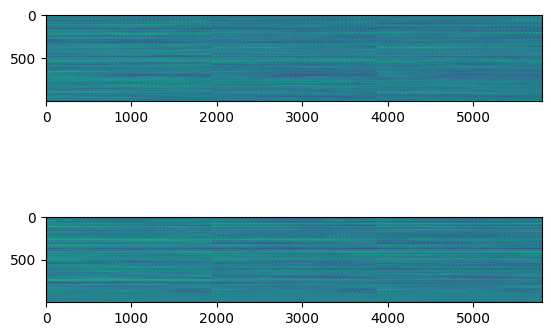

In [16]:
plt.figure
fig, ax = plt.subplots(2)
ax[0].imshow(bad_batch0)
ax[1].imshow(bad_batch4831)